<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-2-Kaggle-Challenge/blob/master/IRA_E_221__assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
# BEGIN CODING HERE

In [4]:
# Split train into train & val

train, val = train_test_split(train, train_size=.80, test_size=0.20,
                             stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [5]:
# Just for kicks -- look at plotly that we did in lecture on long & lat

import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.2)

In [6]:
train[['longitude', 'latitude']].describe()

,longitude,latitude
count,47520.000000,4.752000e+04
mean,34.082431,-5.705946e+00
std,6.552053,2.941332e+00
min,0.000000,-1.164944e+01
25%,33.092142,-8.528215e+00
50%,34.910740,-5.021436e+00
75%,37.170578,-3.327185e+00
max,40.344301,-2.000000e-08


## Define a function to wrangle train, validate, and test sets in the same way.

Fix the location, and do more data cleaning and feature engineering.

In [7]:
train['gps_height'].describe()

count    47520.000000
mean       669.567656
std        693.005745
min        -63.000000
25%          0.000000
50%        372.500000
75%       1320.000000
max       2770.000000
Name: gps_height, dtype: float64

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way."""

    # Prevent SettingWithCopyWarning
    X = X.copy()

    # About 3% of the time, latitude has small values near zero,
    # Outside Tanzania, so we'll treat these values like zero
    X['latitude'] = X['latitude'].replace(-2e-08, 0)

    # when columns have zeros and shouldn't, they are like null values
    # so we will replace the zeros with nulls, and impute missing values later
    cols_with_zeros = ['longitude', 'latitude', 'construction_year',
                       'population']
    for col in cols_with_zeros:
      X[col] = X[col].replace(0, np.nan)

    #### IRA's note: I didn't include gps_height from this one.

    # Drop Duplicate Columns
    duplicates = ['quantity_group', 'extraction_type_class',
                  'extraction_type_group', 'scheme_management',
                  'payment_type', 'quality_group', 'waterpoint_type_group']
    X = X.drop(columns=duplicates)

    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)

    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')

    # Engineer feature: how many yeras from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']

    # return the wrangled dataframe
    return X

    train = wrangle(train)
    val = wrangle(val)
    test = wrangle(test)


In [10]:
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)
## IRA: (ask during TL hours) 'status_group' is a given column in data, no?

In [11]:
print(train.shape)
train.head()

(47520, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [12]:
train.describe()

# Should we drop the ID even now?
# Questions on specific columns: num_private, 
# Construction year -- some are zeroes (see min on them)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,34.082431,-5.705946e+00,0.477736,15.258291,5.616751,179.805513,1302.768939
std,21412.099719,3197.240487,693.005745,6.552053,2.941332e+00,13.312977,17.530228,9.621230,463.081564,950.955437
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18482.750000,0.000000,0.000000,33.092142,-8.528215e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36986.500000,0.000000,372.500000,34.910740,-5.021436e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.170578,-3.327185e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [13]:
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,47520,44616,44603,47520,47520,47234,47520,47520,47520,44876,47520,44392,24988,45077,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,349,1716,1929,30661,9,17231,21,124,2082,2,1,12,2563,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,474,7321,13978,2879,8137,420,4250,2003,257,40838,47520,29470,548,31071,21448,21448,21448,32449,42027,20287,20287,40598,40598,26567,26567,13620,13620,36638,22778,27642,25807


In [14]:
print(val.shape)
val.head()

(11880, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
3290,67999,0.0,2011-07-09,Tasaf,0,DWE,31.509864,-1.153080,Kwawilliam,0,Lake Victoria,Nyakalembe,Kagera,18,7,Misenyi,Kassambya,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
47666,9256,2000.0,2013-02-05,Kidp,1576,KIDP,29.838600,-4.429692,Nyamakanka,0,Lake Tanganyika,Kishengezi B,Kigoma,16,2,Kasulu,Muhinda,1,True,GeoData Consultants Ltd,Water authority,NaN,False,1991,other,other,other,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
2538,3168,25.0,2013-03-28,Rc Church,898,RC CHURCH,37.748364,-4.061791,Kwa Mama Juma,0,Pangani,Majevu A,Kilimanjaro,3,3,Same,Same Urban,420,True,GeoData Consultants Ltd,Water authority,NaN,NaN,2011,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
53117,19684,0.0,2011-07-25,The Desk And Chair Foundat,0,The desk and chair foundat,33.380346,-3.132556,Lahu B,0,Lake Victoria,Lahu,Mwanza,19,4,Kwimba,Nyamilama,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
51817,42303,0.0,2011-08-03,Germany,548,Germany,37.648831,-6.725480,Chazo Cha Kilongo,0,Wami / Ruvu,Kiloka,Morogoro,5,5,Morogoro Urban,Kihonda,500,True,GeoData Consultants Ltd,VWC,NaN,True,1985,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other,non functional


In [15]:
print(test.shape)
test.head()

# Reminder: so the train and val datasets have the status_group column,
# but the test dataset does not.

(14358, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [0]:
## Ask during TL Hours:
## The key differences between the train dataset, and the val dataset.


In [0]:
## Features that I am curious about:
## Whether there is an improvement depending on scheme_management type.
## Whether the water pumps that are payment-dependent are managed better.  (and payment types)
## Differences between source and source_class (are source & source_type dupes?)

In [16]:
train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9795,29534,50.0,2011-03-28,Wd And Id,489,WD and ID,38.268574,-5.450254,Kwa Maseko,4,Pangani,Komfungo A,Tanga,4,6,Handeni,Sindeni,1300,True,GeoData Consultants Ltd,VWC,WD and ID,False,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
58170,20672,0.0,2011-12-07,Danida,0,Central government,33.926294,-9.641293,Kwa Asajile Mwangomale,0,Lake Nyasa,Mpanda,Mbeya,12,3,Kyela,Bujonde,0,True,GeoData Consultants Ltd,VWC,Ngana water supplied scheme,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
17191,10282,0.0,2013-02-02,World Bank,599,Nandra Construction,39.262924,-10.768079,Shuleni,0,Ruvuma / Southern Coast,Kilimahewa,Mtwara,90,33,Newala,Mchemo,1,True,GeoData Consultants Ltd,VWC,Malatu Chini,False,2012,submersible,submersible,submersible,vwc,user-group,other,other,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
8192,64193,30.0,2013-02-07,Finida German Tanzania Govt,426,Finwater,39.348550,-10.642069,Tangini,0,Ruvuma / Southern Coast,Tangini,Mtwara,90,33,Newala,Kitangari,320,True,GeoData Consultants Ltd,VWC,Mitema,False,1988,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
49783,28687,50.0,2011-03-06,Government Of Tanzania,501,RWE,37.562148,-6.888409,Kwa Ndeseme,0,Wami / Ruvu,Masanze,Morogoro,5,6,Mvomero,Mzumbe,90,True,GeoData Consultants Ltd,VWC,Tangeni,True,1982,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional


In [17]:
print(train['source_type'].nunique())
print(train['source_class'].nunique())
print(train['source'].nunique())

## Looks like there are differences between them.

7
3
10


In [18]:
print(train.shape)
train.isnull().sum()
## Am I correct in doing these lookups in "train" dataset?  
## So I see here that scheme_name has 22532 null values.  
## ^^ ask during TL hours -- is that big enough to drop?

(47520, 41)


id                           0
amount_tsh                   0
date_recorded                0
funder                    2904
gps_height                   0
installer                 2917
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3128
scheme_name              22532
permit                    2443
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
train['funder'].nunique()
# high cardinality.  

1716

## Select Features:
### - what's the diff b/w this section and the -wrangling- section? -
(ask during TL hours -- here, we can basically define which features we want to manipulate)

In [20]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])
# ^^ ask during TL hours -- why drop id again?

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# ^^ ask during TL Hours -- is this where we update the features?
## this one looks like it's just including all numeric.
## For our assignment; are we able to be more specific with which features ...
## we want to include?

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()
# ^^ ask during TL Hours -- same concept here.  

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()
# ^^ ask during TL Hours -- same concept here.  


# Combine the lists
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Use scikit-learn pipelines.

In [0]:
## Definitions:
# SimpleImputer - imputation transformer for completing missing values
# imputation strat: "mean", "median", "most_frequent", "constant"

# StandardScaler - standardizes features by removing the mean and scaling to 
## unit variance.



In [29]:
# PIPELINES CAN HELP YOU WRITE MORE CONCISE CODE WITH FEWER ERRORS

#1 import category_encoders as ce
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#2 - make_pipeline function
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    #StandardScaler(),   # Looks like we don't need a standardscaler with pipelines.
    DecisionTreeClassifier(max_depth=17, random_state=42) # and here, we remove LogisticRegression 
)

#3 - Fit on train.
pipeline.fit(X_train, y_train)

#4 - Score on val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

#5 - Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.8600378787878787
Validation Accuracy 0.7712962962962963


## Get and plot coefficients

In [25]:
pipeline.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                     'scheme_management', 'permit', 'extraction_type',
                     'extraction_type_group', 'extraction_type_class',
                     'management', 'management_group', 'payment', 'payment_type',
                     'water_quality', 'quality_group', 'quantity',
                     'quantity_group', 'source', 'source_type', 'source_class',
                     'waterpoint_type', 'waterpoint_type_group'],
               drop_invariant=False, ha

In [27]:
pipeline.named_steps['onehotencoder']

OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                    'scheme_management', 'permit', 'extraction_type',
                    'extraction_type_group', 'extraction_type_class',
                    'management', 'management_group', 'payment', 'payment_type',
                    'water_quality', 'quality_group', 'quantity',
                    'quantity_group', 'source', 'source_type', 'source_class',
                    'waterpoint_type', 'waterpoint_type_group'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [0]:
"""
Look at the graph below -- compared to scatter plots, histograms, pearson graphs.
Definition words: coefficients

Build the coefficient graph on the NYC assignment.

Exploring data: try scatter matrix.
"""

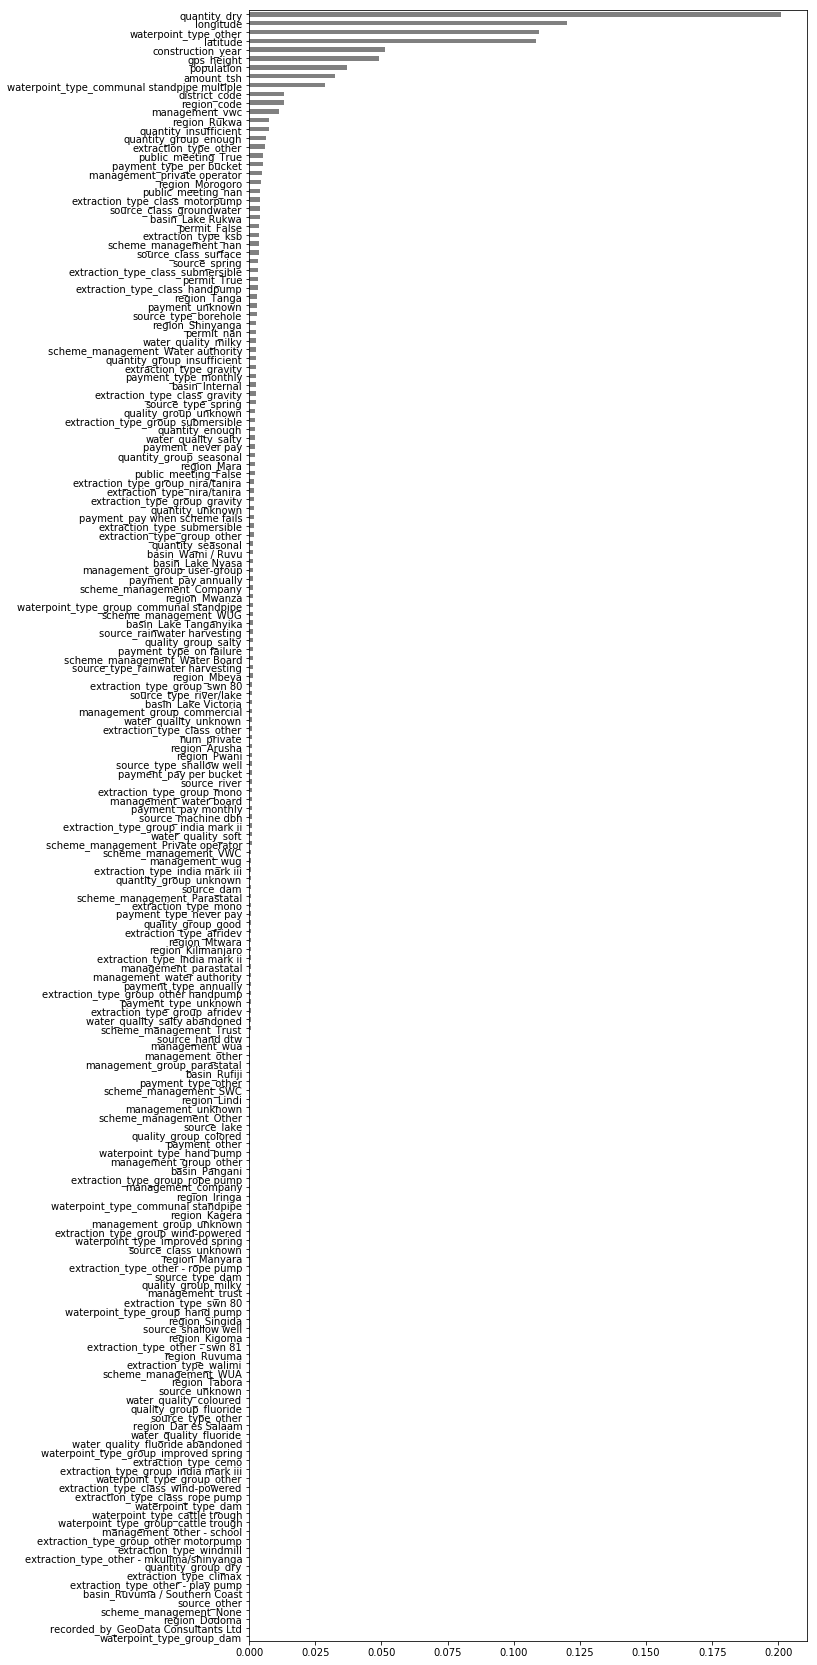

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
## ASK during TL -- why X_val here, vs. X_train?
coefficients = pd.Series(model.feature_importances_, encoded_columns)
## ASK during TL -- model.coef_ (lr) vs model.feature_importances_ (decisiontree)
## how are we supposed to know that?
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

########## Ask during TL hours for clarification.  ####

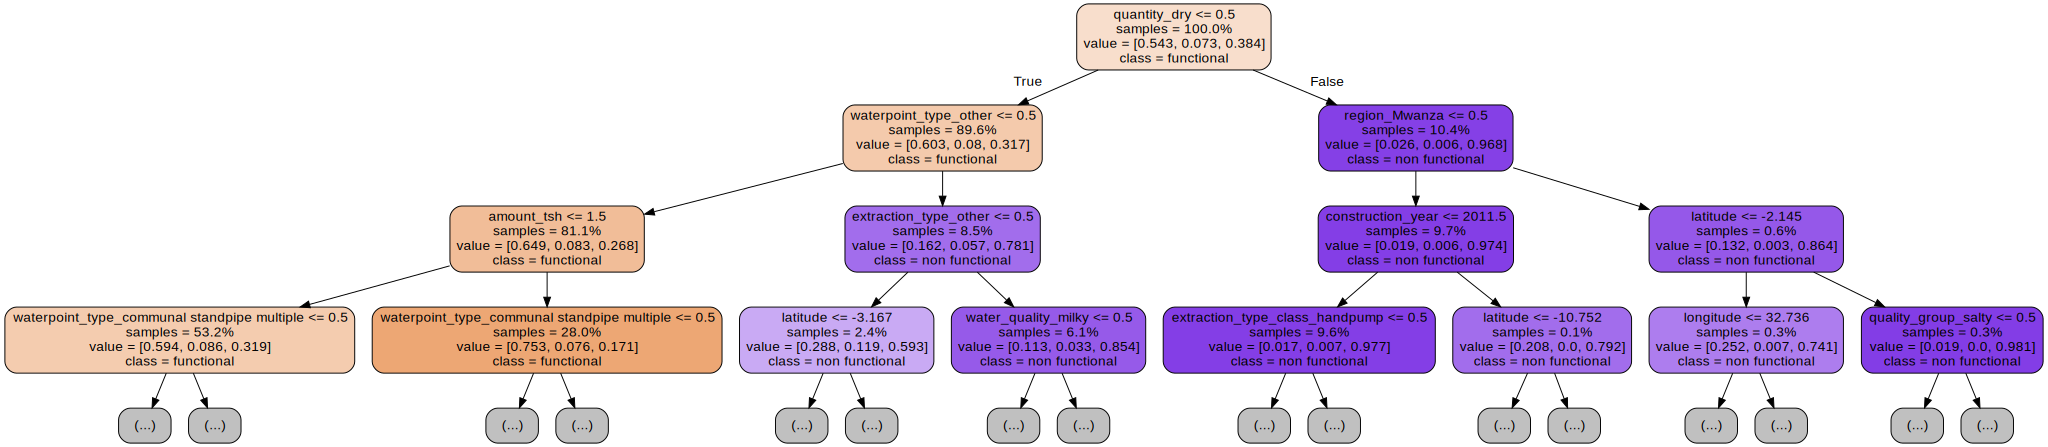

In [32]:
## Documentation on plotting the tree
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model,
                          out_file=None,
                          max_depth=3,
                           feature_names=encoded_columns,
                           class_names=model.classes_,
                           impurity=False,
                           filled=True,
                           proportion=True,
                           rounded=True)
display(graphviz.Source(dot_data))

# Remember: decision trees, when shallow, are considered more interpretable models.

## Reduce Complexity of the Decision Tree

In [33]:
from sklearn.impute import SimpleImputer


## We can either increase min node size / min_samples_leaf, to reduce model 
## complexity, this happens to improve validation accuracy here.

# 2: Pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(min_samples_leaf=20, random_state=42) # we changed this.
)

# 3: fit on train
pipeline.fit(X_train, y_train)

# 4: Score on val
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# 5: Predict on test
y_pred = pipeline.predict(X_test)



Validation Accuracy: 0.7713804713804714


In [34]:
# Increase Max Depth (This time, we ^^ max depth)

# 2: Pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=16, random_state=42) ## This changed.
)

# 3: Fit on train.
pipeline.fit(X_train, y_train)

# 4: Score on val
print('Validation Accuracy:', pipeline.score(X_val, y_val))

# 5: Predict on Test
y_pred = pipeline.predict(X_test)

# So increasing max depth increased our validation accuracy.

Validation Accuracy: 0.7686026936026936


## Get and interpret feature importances of a tree-based model.

In [0]:
model = pipeline.named_steps['decisiontreeclassifier']

In [36]:
model.feature_importances_

# From lecture, "one number for each column in X-matrix; gives insights on ...
# what's important. "

array([3.30774384e-02, 4.58277125e-02, 1.15656652e-01, 9.93318566e-02,
       1.18935797e-03, 1.24853467e-02, 1.36222268e-02, 3.48043190e-02,
       4.85566991e-02, 1.58113125e-03, 2.45574070e-04, 1.70205371e-03,
       1.39158477e-03, 2.46185495e-03, 4.58907297e-04, 6.61923139e-04,
       4.13500969e-03, 7.16874514e-04, 1.23595634e-03, 1.70454180e-04,
       3.72728322e-04, 1.40201281e-04, 0.00000000e+00, 8.08437861e-03,
       1.10938503e-03, 1.44276660e-03, 1.55882934e-03, 3.32107956e-03,
       4.72659147e-04, 5.75572677e-05, 3.69944112e-04, 6.34405131e-05,
       3.77808542e-03, 2.78125473e-03, 1.35737116e-04, 1.84790828e-04,
       2.16719969e-03, 1.94888963e-04, 1.02109016e-04, 5.36431648e-03,
       2.30794876e-03, 4.54159185e-03, 0.00000000e+00, 1.25991471e-03,
       6.00848424e-04, 2.43820899e-03, 2.50000453e-03, 7.09664252e-04,
       1.62529418e-03, 1.11320121e-03, 1.32910928e-03, 1.48733946e-03,
       5.22777575e-04, 3.93602934e-04, 3.40726201e-04, 0.00000000e+00,
      

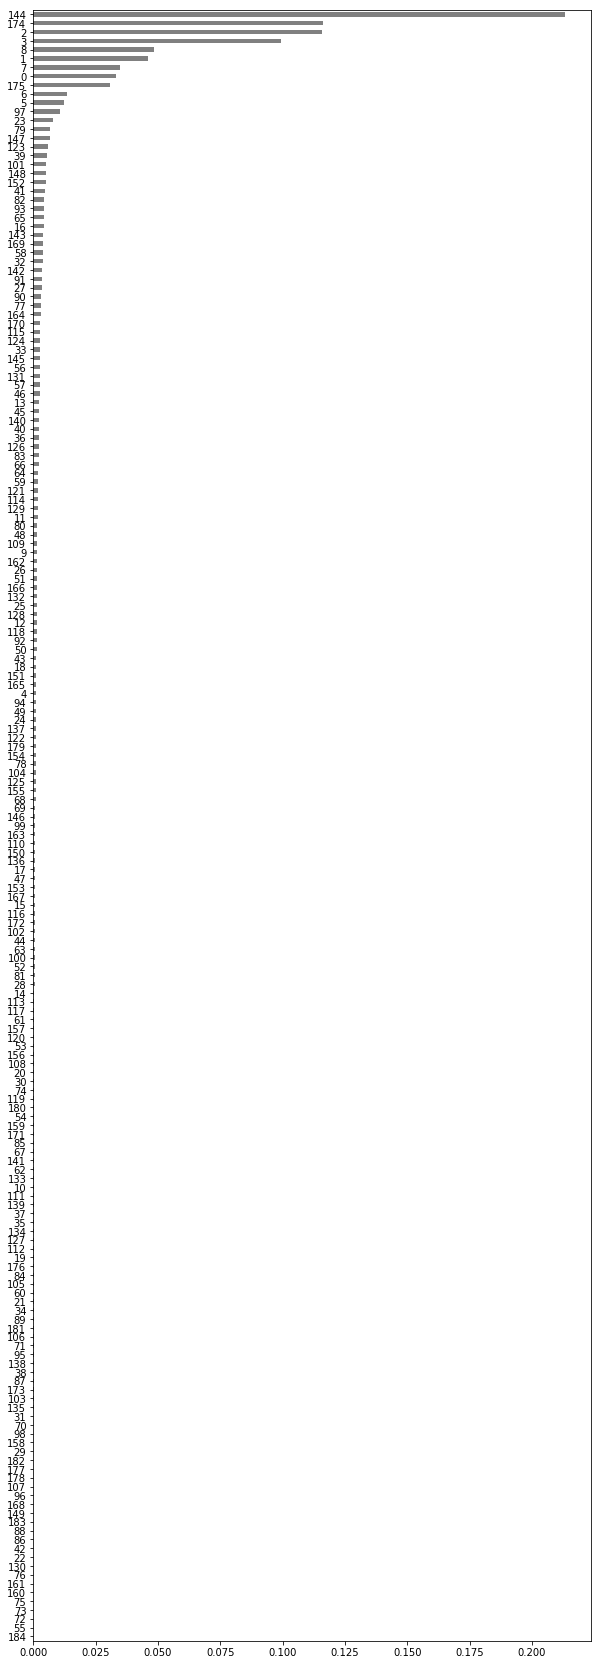

In [37]:
# remember: linear models have coefficients, but trees have feature importances

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

# a feature having high feature importance, means feature user early and/or often
# the more samples split by data, the higher feature importance.

## Understand why decision trees are useful to model non-linear, non-monotonic relationships and feature interactions.

## Example 1: predict which water pumps are functional, just based on location 
(this is from lecture)
(2 features, non-linear, feature interactions, classification)

### Compare a logistic regression with 2 features, longitude and latitude.

In [0]:
# A dataframe with two features
train_location = X_train[['longitude', 'latitude']].copy()
val_location = X_val[['longitude', 'latitude']].copy()

In [39]:
# With just long and lat, a Logistic Regression can't beat the 
# majority classifier baseline.

lr = make_pipeline(
    SimpleImputer(),
    LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
)

lr.fit(train_location, y_train)
print('Logistic Regression:')
print('Train Accuracy', lr.score(train_location, y_train))
print('Validation Accuracy', lr.score(val_location, y_val))

Logistic Regression:
Train Accuracy 0.5430765993265994
Validation Accuracy 0.5430976430976431


## ... versus a Decision Tree Classifier with 2 features, longitude and latitude.

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=16, random_state=42)
)

dt.fit(train_location, y_train)
print('Logistic Regression:')
print('Train Accuracy:', dt.score(train_location, y_train))
print('Validation Accuracy:', dt.score(val_location, y_val))

Logistic Regression:
Train Accuracy: 0.7963594276094276
Validation Accuracy: 0.6477272727272727


## Visualize the decision tree predictions

In [0]:
## this was given to us during lecture
## Use this function later
## (this is from lecture)

%matplotlib inline
import itertools
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns

def pred_heatmap(model, X, features, class_index=-1, title='', num=100):
  """
  Visualize predicted probabilities, for classifier fit on 2 numeric features
  
  Parameters
  ----------
  model : scikit-learn classifier, already fit
  X : pandas dataframe, which was used to fit model
  features : list of strings, column names of the 2 numeric features
  class_index : integer, index of class label
  title : string, title of plot
  num : int, number of grid points for each feature
  """
  
  feature1, feature2 = features
  min1, max1 = X[feature1].min(), X[feature1].max()
  min2, max2 = X[feature2].min(), X[feature2].max()
  x1 = np.linspace(min1, max1, num)
  x2 = np.linspace(max2, min2, num)
  combos = list(itertools.product(x1, x2))
  y_pred_proba = model.predict_proba(combos)[:, class_index]
  pred_grid = y_pred_proba.reshape(num, num).T
  table = pd.DataFrame(pred_grid, columns=x1, index=x2)
  plot_every_n_ticks = int(floor(num/4))
  sns.heatmap(table, xticklabels=plot_every_n_ticks, yticklabels=plot_every_n_ticks)
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.title(title)
  plt.show()

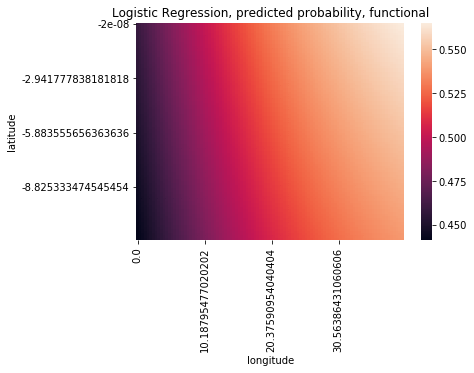

In [42]:
# The color gradients aren't by coincidence, that's how logistic regs work
# So this is the log regression heatmap. (decision tree heatmap is below it)

pred_heatmap(lr, train_location, features=['longitude', 'latitude'],
            class_index=0, title='Logistic Regression, predicted probability, functional')

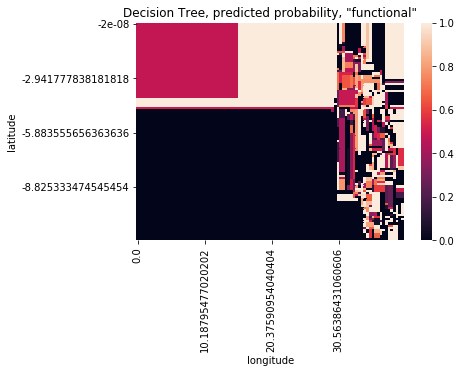

In [43]:
# This is the heatmap for a decision tree.
pred_heatmap(dt, train_location, features=['longitude', 'latitude'],
            class_index=0, title='Decision Tree, predicted probability, "functional"')

## How does  atree grow?  branch by branch!

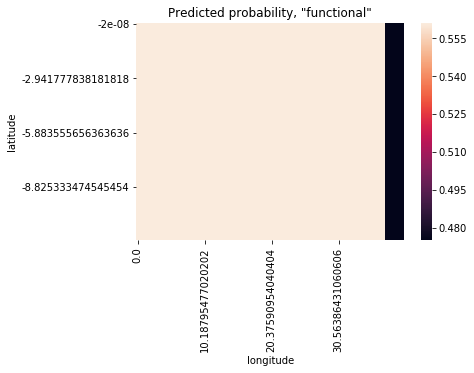

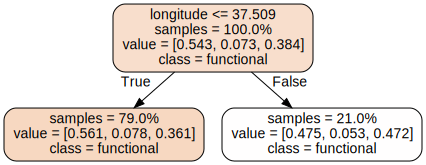

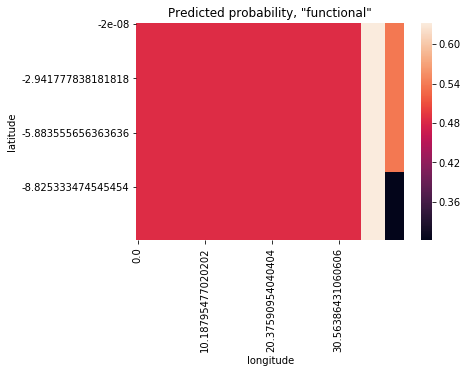

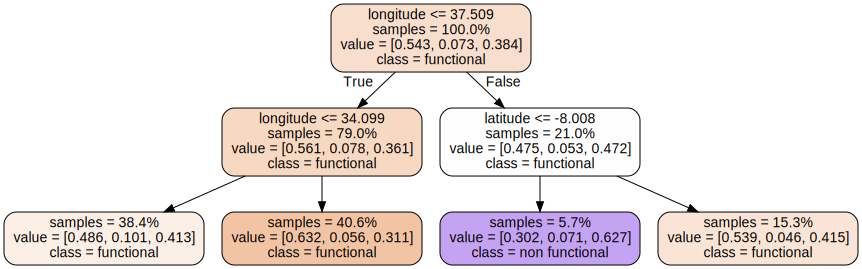

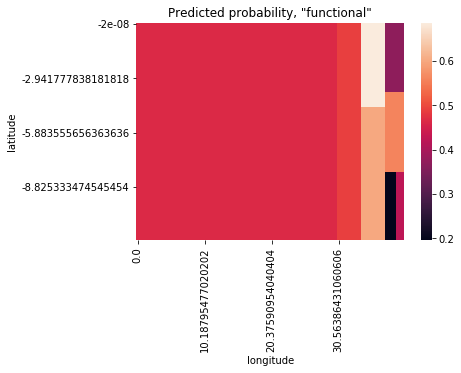

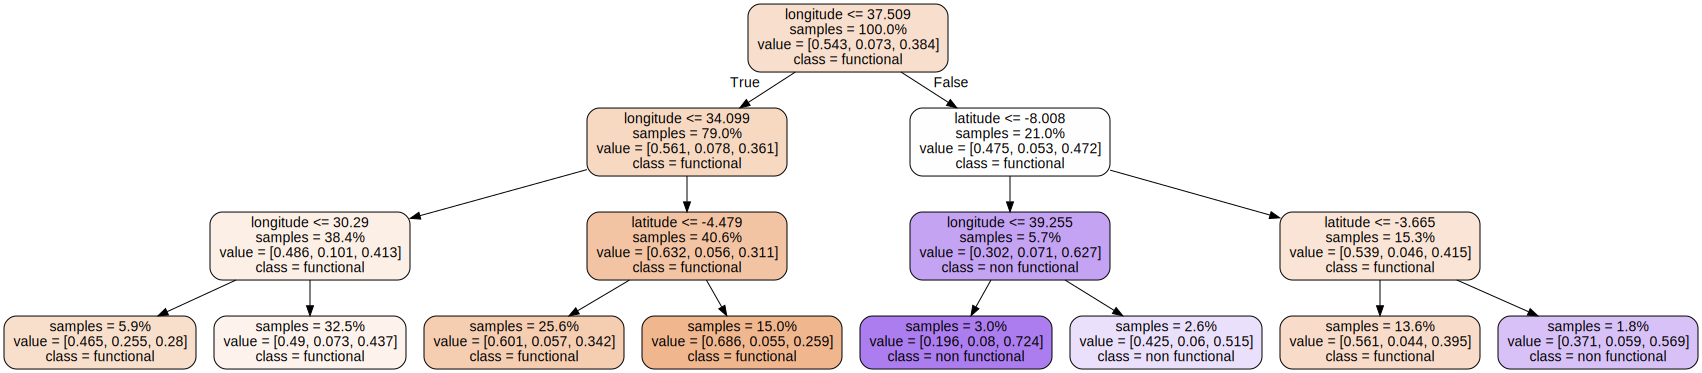

In [44]:
from IPython.display import display, HTML
import graphviz
from sklearn.tree import export_graphviz

for max_depth in[1, 2, 3]:
  
  # Fit decision tree
  dt = make_pipeline(
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  )
  dt.fit(train_location, y_train)
  
  # Display depth & scores
  display(HTML(f'Max Depth {max_depth}'))
  display(HTML(f'Train Accuracy {dt.score(train_location, y_train):.2f}'))
  display(HTML(f'Validation Accuracy {dt.score(val_location, y_val):.2f}'))
  
  # Plot heatmap of predicted probabilities
  pred_heatmap(dt, train_location, features=['longitude', 'latitude'],
              class_index=0, title='Predicted probability, "functional"')
  
  # Plot tree
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  dot_data = export_graphviz(dt.named_steps['decisiontreeclassifier'],
                            out_file=None,
                            max_depth=3,
                            feature_names=train_location.columns,
                            class_names=dt.classes_,
                            impurity=False,
                            filled=True,
                            proportion=True,
                            rounded=True)
  display(graphviz.Source(dot_data))

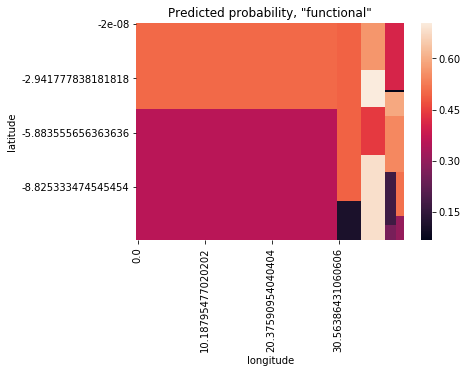

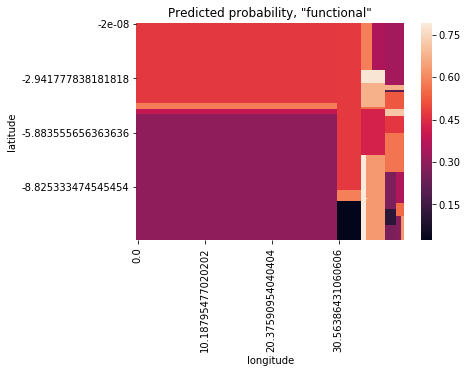

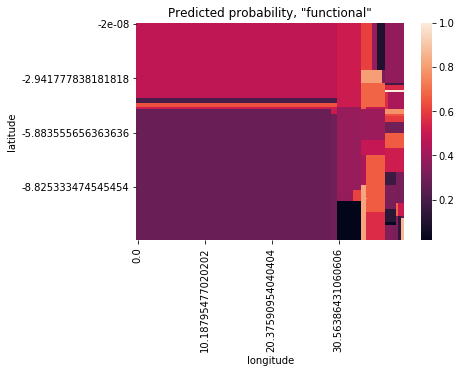

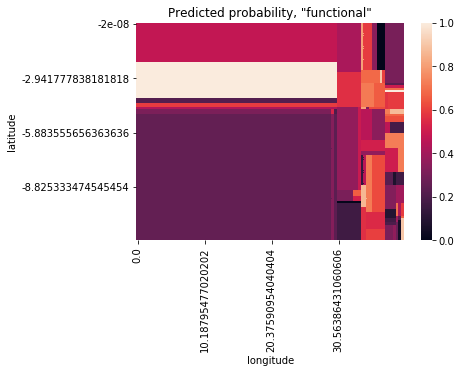

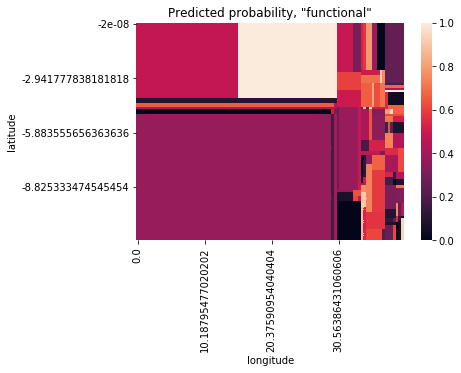

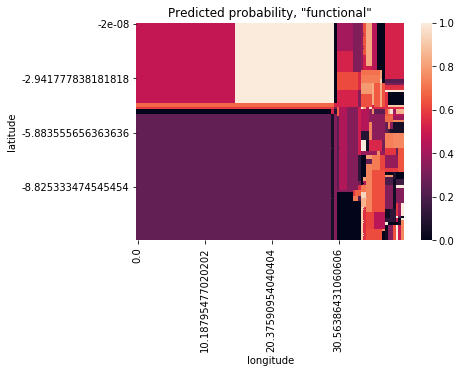

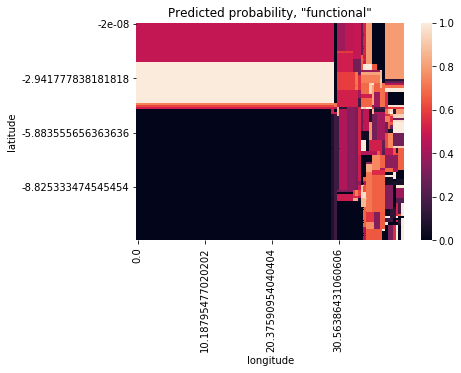

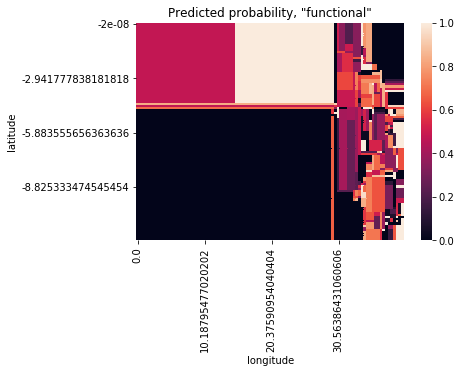

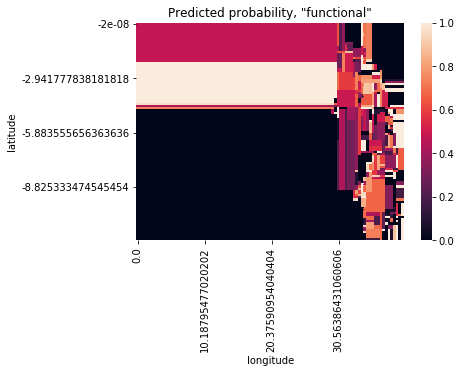

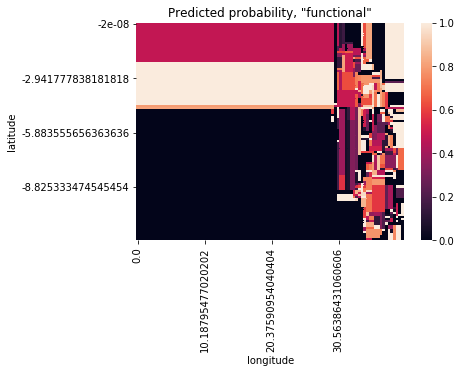

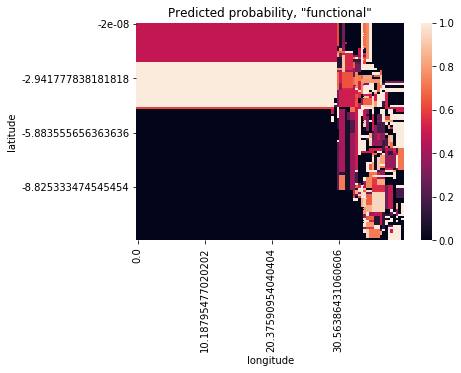

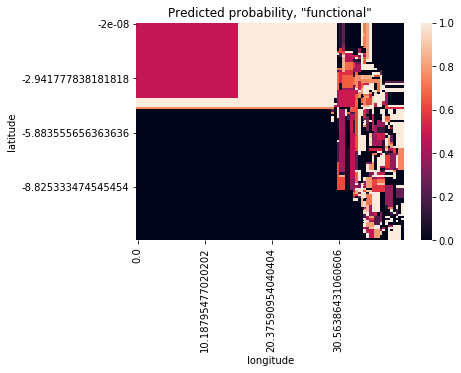

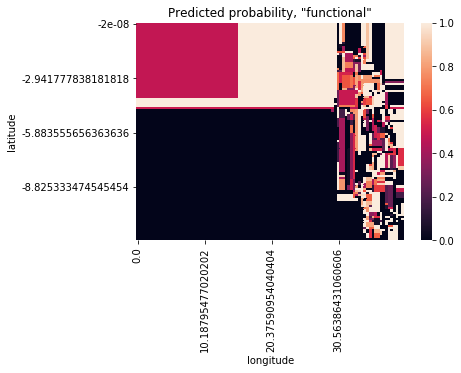

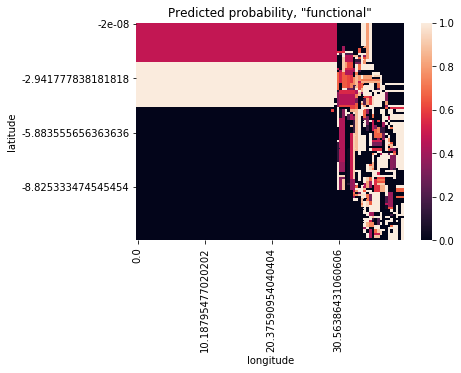

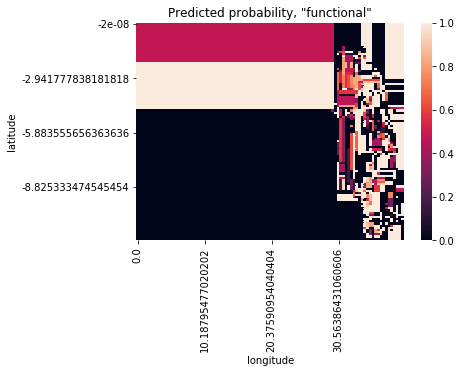

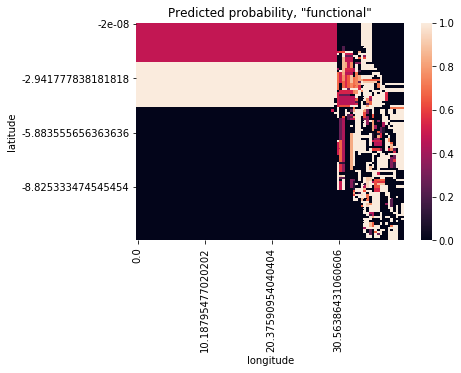

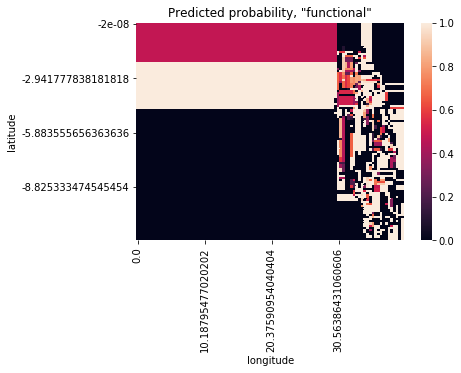

In [45]:
for max_depth in range(4, 21):
  
  # Fit decision tree
  dt = make_pipeline(
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  )
  dt.fit(train_location, y_train)
  
  # Display depth & scores
  display(HTML(f'Max Depth {max_depth}'))
  display(HTML(f'Train Accuracy {dt.score(train_location, y_train):.2f}'))
  display(HTML(f'Validation Accuracy {dt.score(val_location, y_val):.2f}'))
  
  # Plot heatmap of predicted probabilities
  pred_heatmap(dt, train_location, features=['longitude', 'latitude'],
              class_index=0, title='Predicted probability, "functional"')

# Example 2: predicting golf putts
(1 feature, non-linear regression)

** stopped here... will type that for later tomorrow if I have time**
